# Lab 4: Maximum Likelihood Estimation

**Author:** Leo Quintana

**Course:** Physics 434 - Data Analysis Lab  
**Objective:** Practice different estimation methods to find the best PDF for mass distribution data

In this lab, we will analyze a mass distribution dataset using the **Cauchy distribution** (also known as Lorentz or Breit-Wigner distribution). The Cauchy distribution has two parameters:
- **Location parameter (m)**: central mass value
- **Scale parameter (Γ)**: width of the distribution

**Documentation:** [scipy.stats.cauchy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html) 

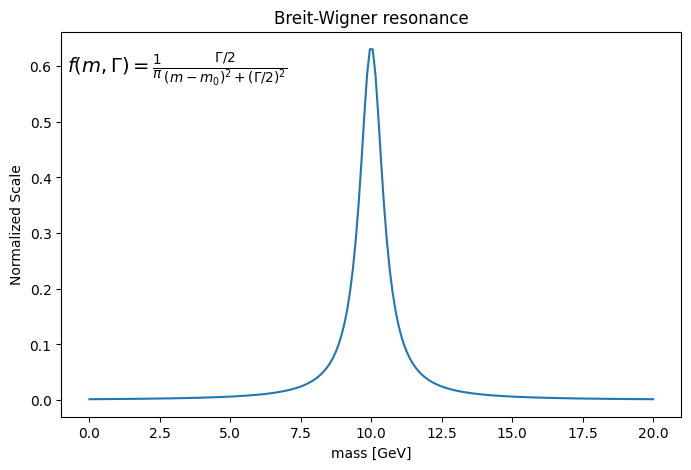

## Setup and Data

In [1]:
# Import required libraries
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import minimize
# from scipy.stats import cauchy
# ...

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import cauchy

In [2]:
# Mass distribution dataset (Units: GeV)
mass = [7.95442531, 10.60408232, 9.9020277, 10.42288788, 17.2193401, 10.06076572,
        10.00176003, 7.8289388, 9.55481385, 9.99981543, 10.3156156, 10.70547087,
        9.80374407, 7.62085689, 9.60747351]

**Your theoretical prediciton**
- What Cauchy distribution is it? Try many centers and widths to match the data!

# Task 1: Visualization (3 points)

Create two types of visualizations for the mass distribution data.

## Part (a): Unbinned Distribution

Draw the unbinned mass distribution showing individual data points as a scatter plot.

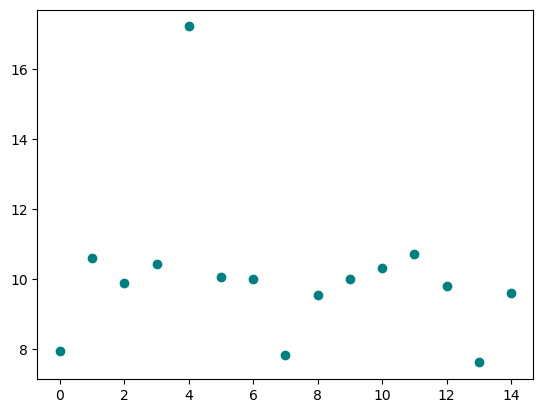

In [3]:
# TODO: Create a scatter plot showing individual mass measurements
fig, ax = plt.subplots()
ax.scatter(range(len(mass)), mass, color='teal', label='Mass Measurments Plot')
ax.set_xlabel('')


## Part (b): Binned Distribution with Error Bars

Create a histogram with bin size 0.5 GeV (range 0-20 GeV) including Poisson error bars.

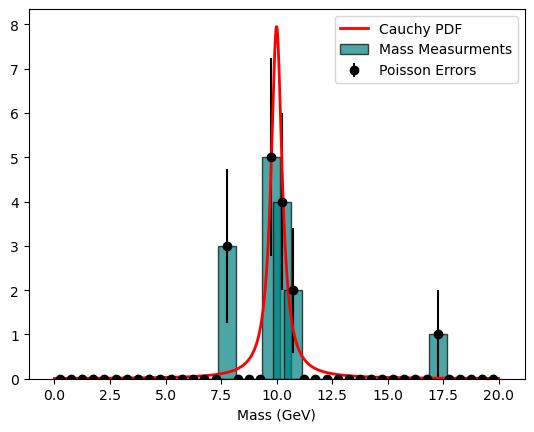

In [100]:
# TODO: Create histogram with error bars (use sqrt(N) for Poisson errors) 
# TODO: Overplot your theoretical Cauchy PDF match histogram (scales from probability to expected counts per bin)

# Ploting the histogram with error bars of the mass measurements using np and matplotlib
counts, bin_edges = np.histogram(mass, range = (0,20), bins = 40)
y_error = np.sqrt(counts)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2 
plt.bar(bin_centers, counts , alpha=0.7, color='teal', label='Mass Measurments', edgecolor='black' );
plt.errorbar((bin_edges[:-1] + bin_edges[1:]) / 2, counts, yerr=y_error, fmt='o', color='black', label='Poisson Errors')
plt.legend();

#Plotting the theoretical Cauchy pdf over the histogram
x = np.linspace(0, 20, 1000)
cauchy_pdf = cauchy.pdf(x, loc = 10, scale = .3)
plt.plot(x, cauchy_pdf * len(mass) * (bin_edges[1] - bin_edges[0]), 'r-', lw=2, label='Cauchy PDF')
plt.xlabel('Mass (GeV)')
plt.legend();




# Task 2: Maximum Likelihood Estimation (4 points)

Use maximum likelihood estimation to find the best-fit parameters for the Cauchy distribution.

## Part (a): Negative Log-Likelihood Function

Construct an unbinned negative log-likelihood function that returns -2*log(L) for the Cauchy distribution.

In [82]:
# TODO: Create your NLL function. HINT: Calculate log-likelihood using scipy.stats.cauchy.logpdf
# Create Negative Log-Likelihood function
def negative_loglikelihood(param, data):
    loc, scale = param # get loc and scale from parameters
    log_likelihoods = cauchy.logpdf(data, loc=loc, scale=scale) # calculate log-likelihoods for each data point
    return -2 * np.sum(log_likelihoods) # return negative log-likelihood


## Part (b): Parameter Space Scanning

Perform a grid search over the (mass, width) parameter space to find the minimum NLL.

In [93]:
# TODO: Define parameter ranges
# TODO: Create range around expected mass value

mass_range = range(0,20) 
mass_range = np.linspace(5,15,1000)
#TODO: Create range for width parameter

width_range = np.linspace(0.1,2,100) # don;t use zero to avoid undefined value

# TODO: Create parameter grids using np.meshgrid

# Create parameter grids
mass_grid, width_grid = np.meshgrid(mass_range, width_range) # using our defined range
# TODO: Calculate NLL for each parameter combination
nll_values = np.ones(mass_grid.shape)

for i in range(mass_grid.shape[0]):
    for j in range(mass_grid.shape[1]):
        nll_value = negative_loglikelihood((mass_grid[i,j], width_grid[i,j]), mass)
        nll_values[i,j] = nll_value
        # Store or print nll_value as needed

# TODO: Find minimum and extract best-fit parameters
initial_guess = [10, 1]  # Initial guess 
#result  = minimize(, initial_guess, args=(mass,))

# find the minimum negative log likelihood and best-fit parameters
min_index = np.unravel_index(np.argmin(nll_values), nll_values.shape)
best_fit_mass = mass_grid[min_index]
best_fit_width = width_grid[min_index]
best_fit_param = (best_fit_mass, best_fit_width)
print(f'The best fit mass is: {best_fit_mass} GeV, and the best fit width is: {best_fit_width:.3f} ')




The best fit mass is: 9.994994994994995 GeV, and the best fit width is: 0.407 


## Part (c): 2D Contour Plot

Create a 2D contour plot showing the NLL landscape with contour levels up to min_nll + 5.

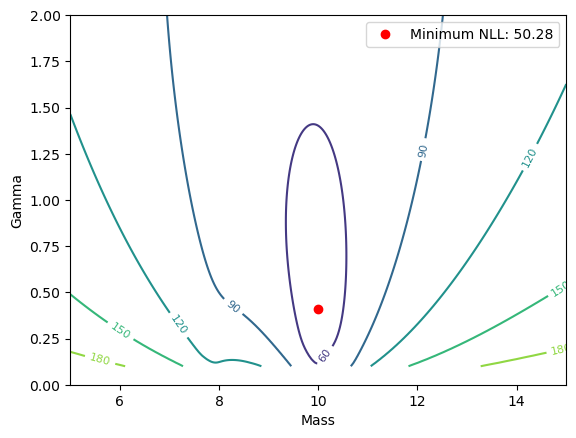

In [101]:
# TODO: Create 2D contour plot of NLL
# TODO: Mark the minimum point
# TODO: Add appropriate labels and colorbar

# Create 2D contour plot of NLL
plot_labels = plt.contour(mass_grid, width_grid, nll_values, levels=4, cmap='viridis')

#Mark minimum point
plt.plot(best_fit_mass, best_fit_width, 'ro', label=f'Minimum NLL: {nll_values[min_index]:.2f}') 
plt.xlim(5, 15)
plt.clabel(plot_labels, inline=1, fontsize=8)
plt.xlabel('Mass')
plt.ylabel('Gamma')
plt.ylim(0,2)
plt.legend();

## Bonus: 3D Surface Plot (2 points)


In [ ]:
# TODO: Create 3D surface plot of NLL

## Part (d): Data with Best-Fit PDF

Plot the histogram overlaid with the theoretical Cauchy distribution using best-fit parameters.

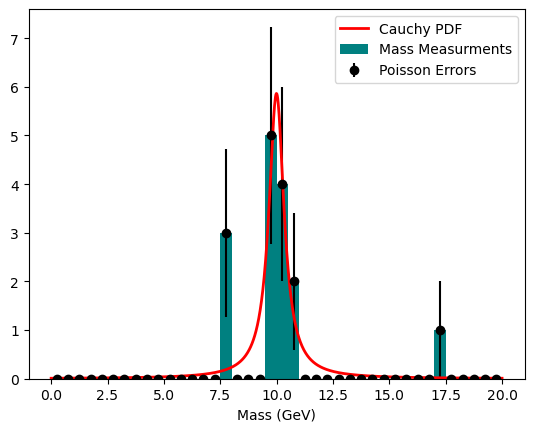

In [117]:
# TODO: Plot histogram of data
# TODO: Calculate and plot theoretical PDF using best-fit parameters
# TODO: Scale PDF to match histogram (scales from probability to expected counts per bin)

# Replot using the best-fit parameters 
counts, bin_edges = np.histogram(mass, range = (0,20), bins = 40)
y_error = np.sqrt(counts)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2 
plt.bar(bin_centers, counts,width = 0.5, color='teal', label='Mass Measurments' );
plt.errorbar((bin_edges[:-1] + bin_edges[1:]) / 2, counts, yerr=y_error, fmt='o', color='black', label='Poisson Errors')
plt.legend();

#Plotting the theoretical Cauchy pdf over the histogram
x = np.linspace(0, 20, 1000)
cauchy_pdf = cauchy.pdf(x, loc = best_fit_mass, scale = best_fit_width)  # use best-fit width
plt.plot(x, cauchy_pdf * len(mass) * (bin_edges[1] - bin_edges[0]), 'r-', lw=2, label='Cauchy PDF')
plt.xlabel('Mass (GeV)')
plt.legend();


# Task 3: Maximum Likelihood vs Chi-squared Method (3 points)

Compare maximum likelihood and chi-squared fitting methods by fixing the width parameter.

## Part (a): Likelihood Profile

Plot -2logL/L_max as a function of mass parameter with fixed width.

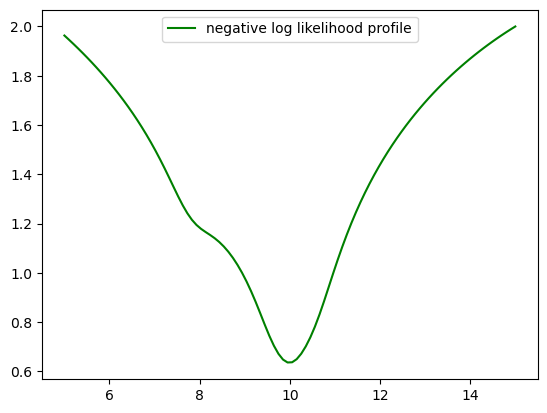

In [121]:
# TODO: Fix width to your best-fit value
fixed_width = best_fit_width
# TODO: Scan mass parameter and calculate NLL profile

mass_scan = np.linspace(5, 15, 100)
nll_profie = [] # emtpy list to store nll values
for n in mass_scan:
    nll_value = negative_loglikelihood((n, fixed_width), mass) # use nll with fixed width
    nll_profie.append(nll_value) # add nll value to list
    
# TODO: Normalize by minimum and plot -2log likelihood

nll_profie = np.array(nll_profie) # convert to numpy array
nll_profie *= 2 / np.max(nll_profie) # normalize
# Plot the fixed width profile
plt.plot(mass_scan, nll_profie, 'g-', label='negative log likelihood profile');
plt.xlabel('Mass')
plt.ylabel('-2 log likelihood')
plt.legend();




## Part (b): Chi-squared Method

Construct and minimize the chi-squared function for binned data.

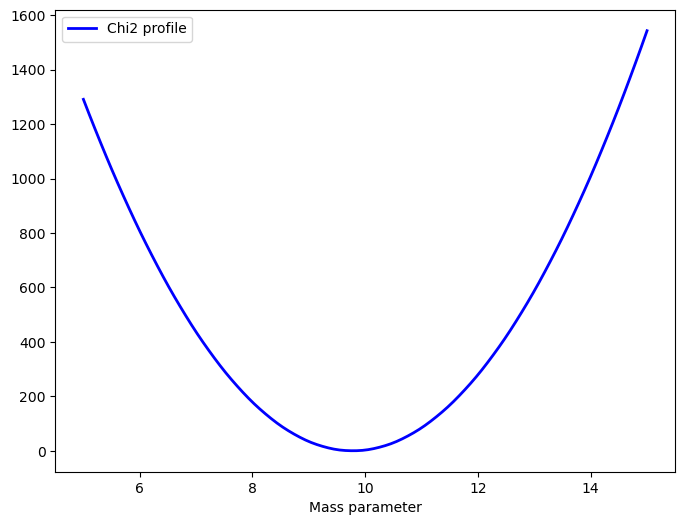

In [146]:
# TODO: Create your chi-squared function. Scan mass parameter for chi-squared
def chi_squared(param, data, bin_edges):
    (loc, scale) = param
    observed, _ = np.histogram(data, bins = bin_edges, range= (0,20))
    
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = bin_edges[1] - bin_edges[0] 
    
    N_total = len(mass)
    expected = N_total * cauchy.pdf(bin_centers, loc=loc, scale=scale) * bin_width
    
    chi_squared_value = np.sum((observed - expected)**2 / expected)
    return chi_squared_value


# TODO: Calculate Δχ² = χ²(m) - χ²_min log likeihood

mass_scan = np.linspace(5, 15, 100)
chi2_profile = [] #empty list to store chi2 values
ml_best_width = best_fit_width  # fixed best-fit width

bin_edges = np.arange(0, 20.5, 0.5)
for m in mass_scan:
    chi2_value = chi_squared([m, ml_best_width], mass, bin_edges) # use chi2 with fixed width
    chi2_value = np.array(chi2_value)
    chi2_profile.append(chi2_value) # add chi2 value to list 
    min_chi2 = np.min(chi2_profile)
    delta_chi2_profile = chi2_profile - min_chi2
    
    
chi2_profile = np.array(chi2_profile) # convert to numpy array

# Plot the fixed width chi-squared profile
plt.figure(figsize=(8, 6))
plt.plot(mass_scan, delta_chi2_profile, 'b-', linewidth=2, label='Chi2 profile')
plt.xlabel('Mass parameter')
plt.legend()


# find the minimum negative log likelihood and best-fit parameters
#min_index = np.unravel_index(np.argmin(nll_values), nll_values.shape)
#best_fit_mass = mass_grid[min_index]
#best_fit_width = width_grid[min_index]
#best_fit_param = (best_fit_mass, best_fit_width)
    
    


## Part (c): Method Comparison

Compare maximum likelihood and chi-squared methods by plotting both profiles.

In [ ]:
# TODO: Plot both curves on same axes
# - blue: Maximum Likelihood 
# - orange: Chi-squared
# TODO: Compare the shape and minimum positions
# TODO: Add observations about which method is more precise

#Plot the Maximum likelihood

#Plot the Chi2 

# Bonus: Using iminuit Package (3 points)

Use the iminuit package for professional maximum likelihood fitting.

In [ ]:
# TODO: Install and import iminuit
try:
    from iminuit import Minuit
    from iminuit.cost import UnbinnedNLL
    print("iminuit imported successfully!")
    IMINUIT_AVAILABLE = True
except ImportError:
    # print("Installing iminuit...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "iminuit"])
    from iminuit import Minuit
    from iminuit.cost import UnbinnedNLL
    IMINUIT_AVAILABLE = True

## Implementation with iminuit

Use the iminuit package for professional maximum likelihood fitting with parameter errors.

In [ ]:
# TODO: Define Cauchy PDF for iminuit
# TODO: Set up unbinned negative log-likelihood cost function
# TODO: Create Minuit object with initial parameter guesses
# TODO: Run the fit using migrad() and hesse()



# TODO: Display fit results in the histogram with parameter errors

# Discussion and Analysis

**Answer the following questions based on your results:**


## Task 2 Discussion: Maximum Likelihood Estimation

**Question 1:** Analyze your NLL contour plots and parameter estimation results. What does the shape of the contours tell you about parameter correlations? How sensitive is the fit to small changes in the mass and width parameters? Compare your best-fit parameters to your initial theoretical prediction from Task 1.

**Your Answer:**

---

## Task 3 Discussion: Method Comparison

**Question 2:** Compare the likelihood profile and chi-squared methods. Which method gave a more precise estimate of the mass parameter? How do the shapes of the two curves differ near the minimum? Explain why the maximum likelihood method is generally preferred for small datasets like ours (15 data points).

**Your Answer:**

---

## Model Comparison and Overall Analysis

**Question 3:** Compare all the fitting approaches you used (manual grid search, scipy optimization, and iminuit if completed). Did they all converge to the same parameter values? Which method was most efficient? Which provided the most complete uncertainty information?

**Your Answer:**


## Submission Instructions

> **📋 Important Notice:** When you have completed all sections of this lab, please download your notebook as an HTML file for submission on Canvas.
> 
> **To download as HTML:**
> 1. Go to **File** → **Download as** → **HTML (.html)**
> 2. Save the file with a descriptive name (e.g., `Lab4_YourName.html`)
> 3. Upload the HTML file to the corresponding Canvas assignment
> 
> Make sure all cells have been executed and all outputs are visible before downloading!